In [1]:
## MANE 4962 Homework 3 Question 3
# Load Modules
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import skimage as ski
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import StandardScaler

In [2]:
# Load Data and display related information
health = load_breast_cancer()
# display(data)
display(health.target)
display(health.feature_names)
display(health.target_names)
display(health.data.shape)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

array(['malignant', 'benign'], dtype='<U9')

(569, 30)

In [3]:
# Modifing Dataset (Best Two Features)
# df = load_breast_cancer(as_frame=True) # Want in Pandas Data Frame
display(health.data.shape) # Size 30 correspond to the 30 feature names
X, y = health.data, health.target #y-data is already normalized to 0 and 1 
X = np.column_stack((X[:,0], X[:,2]))  # Pick two datasets
display(X.shape)

(569, 30)

(569, 2)

In [4]:
# Spliting Dataset to 70/30 Split
X_train, X_test, y_train, y_test = train_test_split(
    X,y,
    test_size=0.30,
    train_size=0.70, 
    random_state = 42)

# Display Data
print('X_train shape :', X_train.shape)
print('X_test shape :', X_test.shape)
print('y_train shape :', y_train.shape)
print('y_test shape :', y_test.shape)

X_train shape : (398, 2)
X_test shape : (171, 2)
y_train shape : (398,)
y_test shape : (171,)


In [5]:
# Logistic Regression Model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_prob = log_reg.predict_proba(X_test) # Probability
y_pred = log_reg.predict(X_test) # Predicition
acc = accuracy_score(y_test, y_pred)
print("Accuracy: ", acc*100)
print(classification_report(y_test, y_pred))

Accuracy:  92.39766081871345
              precision    recall  f1-score   support

           0       0.95      0.84      0.89        63
           1       0.91      0.97      0.94       108

    accuracy                           0.92       171
   macro avg       0.93      0.91      0.92       171
weighted avg       0.93      0.92      0.92       171



In [15]:
## Create Code that automatically parse through two features and pick the one with the highest accuarcy
X, y = health.data, health.target # Re-initalized variable
log_reg = LogisticRegression() # Model
acc = 0; 
tol = 0.97; 
idx = 0; 
while acc < tol:
    num = np.random.randint(0,30,2) # 30 different features
    if num[0] == num[1]:
        num[1] = num[1] + 1 # Prevent Duplicates
    data1 = X[:,num[0]] # Pick two datasets from random number generator
    data2 = X[:,num[1]]
    X_data = np.column_stack((data1, data2)) # Stack Column

    X_train, X_test, y_train, y_test = train_test_split(
        X_data,y, test_size=0.30,train_size=0.70, random_state = 42) # Traning and Test Set

    # Run Model
    log_reg.fit(X_train, y_train)
    y_prob = log_reg.predict_proba(X_test) # Probability
    y_pred = log_reg.predict(X_test) # Predicition
    acc = accuracy_score(y_test, y_pred)
    
    if idx == 1000:
        break
    idx += 1

print("Accuracy: ", acc*100)
print(classification_report(y_test, y_pred))
display(num[0])
display(num[1])

Accuracy:  97.07602339181285
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        63
           1       0.97      0.98      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



21

22

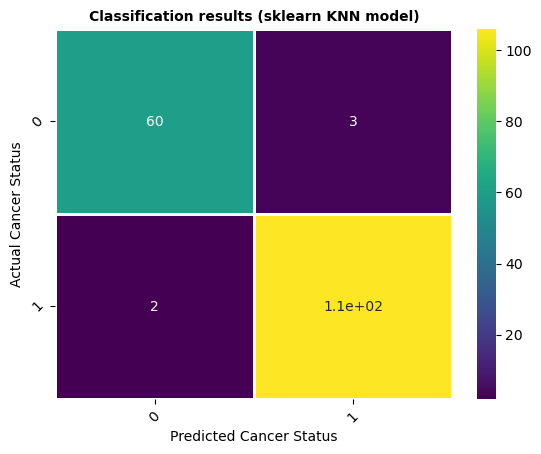

In [17]:
targ = np.array([0, 1])
cm_sk = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm_sk,linewidths=2, annot=True, cmap='viridis', cbar=True);
ax.set_xticklabels(targ);
ax.set_yticklabels(targ);
plt.xlabel('Predicted Cancer Status');
plt.ylabel('Actual Cancer Status');
plt.xticks(rotation=45);
plt.yticks(rotation=45);
plt.title('Classification results (sklearn KNN model)', fontsize='medium', fontweight='bold');

In [78]:
### From trial and error the best data to use for the most accurate classification are mean_radius, fractal dimension error, worst radius,
### worst texture. Different other data combination result in lower accuracy in classification. Overall a max of 97% accuracy can be achieve using
### any combination of data from trial and error.